In [110]:
#importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Dropout,Flatten

In [111]:
#fetch Images count from folders

In [112]:
count =0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print(dir + 'Folder has '+str(len(files))+' Images')
    count = count +len(files)
    print('Images folder has '+ str(count)+' Images')

Black Sea SpratFolder has 50 Images
Images folder has 50 Images
Gilt Head BreamFolder has 50 Images
Images folder has 100 Images
Horse MackerelFolder has 50 Images
Images folder has 150 Images
Red MulletFolder has 50 Images
Images folder has 200 Images
Red Sea BreamFolder has 50 Images
Images folder has 250 Images
Sea BassFolder has 50 Images
Images folder has 300 Images
ShrimpFolder has 50 Images
Images folder has 350 Images
Striped Red MulletFolder has 50 Images
Images folder has 400 Images
TroutFolder has 30 Images
Images folder has 430 Images


In [113]:
base_dir= 'Images/'
img_size = 180
batch = 32

In [114]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))


Found 430 files belonging to 9 classes.
Using 344 files for training.
Found 430 files belonging to 9 classes.
Using 86 files for validation.


In [115]:
fish_names = train_ds.class_names
fish_names

['Black Sea Sprat',
 'Gilt Head Bream',
 'Horse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [116]:
import matplotlib.pyplot as plt

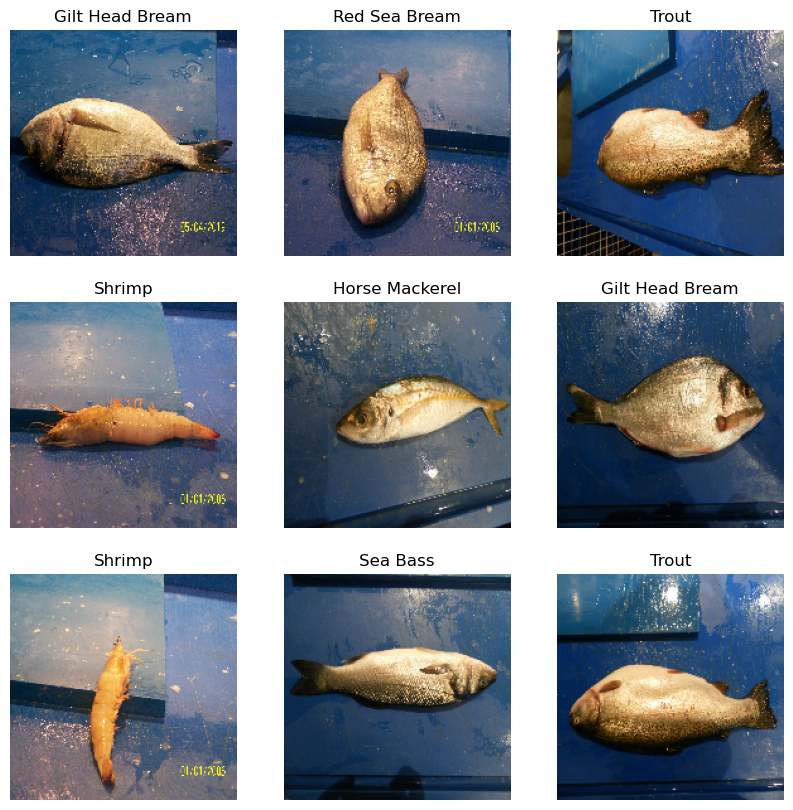

In [118]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fish_names[labels[i]])
        plt.axis('off')

In [119]:
AUTOTUNE = tf.data.AUTOTUNE

In [120]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [121]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [122]:
#data Augmentation
#sequential errors are not modified as the final outcome of this is not going to be good

In [123]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [124]:
#augmentation error occured and then resolved by including RGB format in the Input
#data_augmentation = Sequential([
   # layers.RandomFlip("horizontal",input_shape = (img_size,img_size)),
    #layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1)
#])
    

In [125]:
for images, labels in train_ds.take(1):
    print(f"Before Augmentation - Images dtype: {images.dtype}, Labels dtype: {labels.dtype}")
    augmented_images = data_augmentation(images)
    print(f"After Augmentation - Images dtype: {augmented_images.dtype}")


Before Augmentation - Images dtype: <dtype: 'float32'>, Labels dtype: <dtype: 'int32'>
After Augmentation - Images dtype: <dtype: 'float32'>


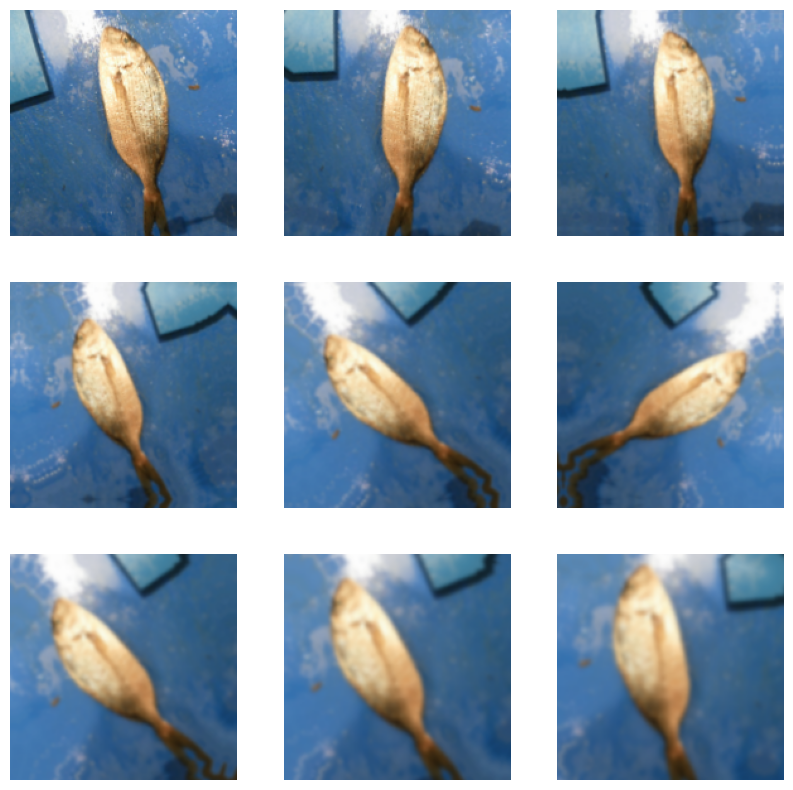

In [126]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [127]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(9)
])

    

In [128]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 997,609 (3.81 MB)

 Trainable params: 997,609 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8184 - loss: 0.5581 - val_accuracy: 0.6395 - val_loss: 1.2801
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7625 - loss: 0.6349 - val_accuracy: 0.7093 - val_loss: 1.1336
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8214 - loss: 0.5286 - val_accuracy: 0.5930 - val_loss: 1.1951
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7937 - loss: 0.6054 - val_accuracy: 0.5465 - val_loss: 1.5863
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8237 - loss: 0.4814 - val_accuracy: 0.4651 - val_loss: 1.8460
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8047 - loss: 0.5428 - val_accuracy: 0.5698 - val_loss: 1.5190
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8192 - loss: 0.4728 - val_accuracy: 0.6395 - val_loss: 1.2803
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8076 - loss: 0.5111 - val_accuracy: 0.6860 - v

In [132]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'This is an Image of '+fish_names[np.argmax(result)]+ ' with a accuracy score of '+str(np.max(result)*100)
    return outcome

In [133]:
classify_images('Sample/Shrimp.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'This is an Image of Shrimp with a accuracy score of 74.59478378295898'

In [137]:
model.save('FishMe_Image_Recognition.keras')